# Bootstrapping statistics notebook
### David Islip

In [1091]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [1092]:
from platform import python_version
python_version()

'3.8.3'

In [1093]:
T = 1000
K = 2000
dist = "normal"
np.random.seed(1)

def sample(status, p = 0.5):
    if status == "normal":
        return random.normal(0, 1, T)
    elif status == "uniform":
        return random.uniform(0, 1, T)
    elif status == "bernoulli":
        return random.binomial(1, p, T)
    else:
        return None
#Sample = random.normal(0, 1, N)
#Sample = random.uniform(0, 1, N)
Sample = sample("bernoulli")
Sample

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,

### Sample with replacement $T$ points $B$ times
$\mu^{(b)}$ is the statistic computed using the $T$ observations associated with batch $b\in[B]$

In [1094]:
Bootstrap = np.random.choice(Sample, size=(K,T), replace=True)
Bootstrap

array([[0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 0, 1]])

### Results for normal variables relating the mean absloute deviation and standard deviation
If $X \sim N(\mu, \sigma)$ then $\mathbb{E}[|X - \mu|] = \sqrt{\frac{2}{\pi}} \sigma$

In [1095]:
mean_ = Sample.mean()
mean_
print("Estimated sample mean: ",mean_)
print("Expected MAD: Analytical Formula Assuming Normality", ((2/np.pi)**(0.5))*Sample.std())

Estimated sample mean:  0.506
Expected MAD: Analytical Formula Assuming Normality 0.3989135555231109


In [1096]:
print("Expected MAD via Bootstrapping: ", np.abs(Sample - mean_).mean())

Expected MAD via Bootstrapping:  0.499928


### Central limit theorem
The central limit theorem states that if $\{X_t \}_{t \in [T]}$ are $T$ samples drawn iid from a distribution with true mean $\bar{\mu}$ and variance $\sigma^2$, then $Z = \lim_{T \rightarrow \infty} \sqrt{T} (\frac{1}{T}\sum{X_T} - \mu)/{\sigma}$ follows a standard normal distribution. The mean and variance of the sample estimate $\frac{1}{T} \sum_t X_t = \frac{1}{T} \sum_t X_t^2$ are $\bar{\mu}$ and $\frac{\sigma}{\sqrt{T}}$, therefore, for large $T$:
$$
\begin{equation}\label{appendix:mean}
    \frac{1}{T} \sum_t X_t \overset{d}{\rightarrow} N(\bar{\mu}, \frac{\sigma}{\sqrt{T}})
\end{equation}
$$

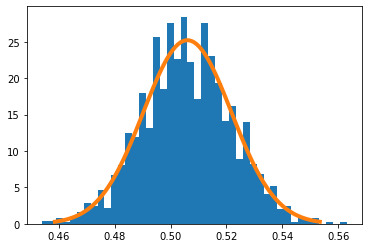

In [1097]:
plt.hist(Bootstrap.mean(axis = 1), bins= int(np.sqrt(K)), density = True);
x = np.linspace(mean_ - 3*Sample.std()/((T)**(0.5)), mean_ + 3*Sample.std()/((T)**(0.5)), 100)
plt.plot(x, norm.pdf(x, mean_, Sample.std()/((T)**(0.5))), lw = 4)
plt.show()

In [1098]:
mean_

0.506

In [1099]:
#theortical variation of mean
stderr = Sample.std()/((T)**(0.5))
stderr

0.015810249839898163

In [1100]:
#variations of bootstrapped samples
stderr_boot = (Bootstrap.mean(axis = 1) - mean_).std()
stderr_boot

0.015837997853264167

### Quantile of Absolute Deviations
In the work by \citet{ho2015weighted}, the optimal portfolio solves:

$$
\begin{equation} \label{ELASTIC-NET}
\begin{aligned} 
\min_{x} \quad & x^{\intercal}\Sigma x + x^{\intercal} \text{diag}\{\alpha_i\} x + \beta^{\intercal} |x| &\\ 
\textrm{s.t.} \ \quad & \mu^\intercal x  \geq \bar{R},\ x \in \Delta_N \\
\end{aligned} \tag{ELASTIC-NET}
\end{equation}
$$
where $\beta \in \mathbb{R}_+^N$ and $\alpha_i \in \mathbb{R}_+ \ \forall i \in [N]$ denote the penalty parameters. \citet{ho2015weighted} show that $\alpha_i$ and $\beta_i$ correspond to the sizes of box-uncertainty sets used in the robust counterpart of the mean-variance optimization problem. Specifically, $\alpha_i$ and $\beta_i$ correspond to uncertainty in the diagonal of the \textbf{estimated} covariance matrix $\Sigma_{ii}$ and expected return $\mu_i$ respectively for for asset $i = 1,2,\hdots, N$. \citet{ho2015weighted} use a bootstrapping approach to select the values of $\beta_i$ and $\alpha_i$; they proceed as follows: Let $\{X^{(t)} \in \mathbb{R}^N\}_{t \in [T_{train}]}$ denote $T_{train}$ observations of the random variable $X$ used to available to estimate $\Sigma$ and $\mu$. The estimation errors are computed by re-sampling $T_{train}$ observations with replacement from the original set of observations $B$ times. Each re-sampling yields estimates of the mean and covariance $\hat{\mu}^{(b)}, \hat{\Sigma}^{(b)} \ b \in [B]$. Let $p_1$ and $p_2$ denote the investor's aversion to estimation risk of the mean and variance respectively. The values for $\beta_i$ and $\alpha_i$ are defined as the quantiles of the bootstrapped deviations
$$
\begin{equation*}
    \alpha_i = \inf {\Big \{}t {\Big |} \frac{1}{B} \sum_{b=1}^{B} {\bf{1}}{\Big [}|\hat{\Sigma}^{(b)}_{ii} - \Sigma_{ii}| < t {\Big ] } > p_1 {\Big \}}
\end{equation*}$$

and 
$$
\begin{equation*}
    \beta_i = \inf {\Big \{}t {\Big |} \frac{1}{B} \sum_{b=1}^{B} {\bf{1}}{\Big [}|\hat{\mu}^{(b)}_{i} - \mu_{i}| < t {\Big ] } > p_2 {\Big \}}
\end{equation*}$$


### Quantile of absolute deviation for standard normal 
One can express the quantile of the absolute deviation of a normal variables in a closed form equation. The results can be derived as follows: letting $Z \sim N(0,1)$ then the quantile of the absolute deviation satisfies $P(|Z| \leq x) = p$ which is the same as  $2\Phi(x) - 1 = p$ which implies 
$$
\begin{equation}\label{quantile}
    x = \Phi^{-1}(\frac{p+1}{2}) 
\end{equation}
$$

In [1079]:
## quanile of deviations
p = 95
np.percentile(np.abs(Bootstrap.mean(axis = 1) - mean_), p)

0.031000000000000028

In [1080]:
#quantile of deviations based on 
(Sample.std()/((T)**(0.5)))*norm.ppf((p+100)/200)

0.030987520272780556

In [1081]:
norm.ppf((p+100)/200)

1.959963984540054

https://mathworld.wolfram.com/StandardDeviationDistribution.html

### Distribution of standard deviations can be obtained via the delta method (except for nominal cases)

i) https://stats.stackexchange.com/questions/104875/question-about-standard-deviation-and-central-limit-theorem
ii) https://math.stackexchange.com/questions/2047811/why-does-the-second-order-delta-method-approximation-to-the-variance-of-bernoull
iii) https://books.google.ca/books/about/Elements_of_Large_Sample_Theory.html?id=geIoxvgTXlEC&redir_esc=y

The case of determining an approximation for the distribution of $\Sigma$ is more complex because obtaining the asymptotic distribution of $\Sigma =  \frac{1}{T}\sum X_i^2 - (\frac{1}{T} \sum_t X_t)^2$ requires the use of the delta method. Let $W_2$ and $W_1$ denote $\frac{1}{T} \sum X_i^2$ and $\frac{1}{T} \sum_t X_t$ respectively. $W_1$ and $W_2$ converge to a joint normal distribution by the multivariate central limit theorem with covariance $\Xi_{W_j, W_k} = \mathbb{E}[W_j W_k] - \mathbb{E}[W_j]\mathbb{E}[W_k]$ and true mean ${\bf{\bar{W}}}$ i.e $\sqrt{T}(\bf{W} - {\bf \bar{W}} ) \overset{d}{\rightarrow} N(\bf{0}, \Xi)$. In general, for any differentiable $g(W_1,W_2)$ one can write the following first-order taylor expansion $g(W_1, W_2) \approx  g({\bf\bar{W}}) + \nabla g({\bf\bar{W}})({\bf{W}} - {\bf \bar{W}})$. Using this approximation $\mathbb{V}[g(\bf{W})] \approx \nabla g(\bf{W})^{\intercal} \Xi \nabla g(\bf{W})$ and as such $\sqrt{T}(g(\bf{W}) - g(\bf{\bar{W}}) ) \overset{d}{\rightarrow} N(0,\nabla g(\bf{W})^{\intercal} \Xi \nabla g(\bf{W}))$. One can set $g(W_1,W_2) = W_2 - W_1^2$ and use the first order delta method as described above to obtain asymptotic convergence condition. 

The first order delta method does not always work. Convergence to normality does not hold for Bernoulli variables with $p = 0.5$ because the variance of $g$ ends up being zero. To combat this, the second order taylor approximation must be used. For simplicity, in the case of Bernoulli random variables $g$ can be expressed as a function of a single random parameter: $\hat{p}$ since $\frac{1}{T} \sum_t X_t = \frac{1}{T} \sum_t X_t^2$. In this case, $g(\hat{p}) = \hat{p}(1-\hat{p})$ and the true mean is $p=1/2$. It follows by taking the second order taylor expansion around the true mean i.e $\hat{p} = 0.5$ that, $\hat{p}(1-\hat{p}) = 1/4 + 0*(\hat{p}-0.5) + 1/2 (-2) (\hat{p} - 1/2)^2$. Since $\hat{p} = \frac{1}{T} \sum_t X_t$ is asymptotically normal by the central limit theorem and since $\hat{p}(1-\hat{p})$ is a constant minus an asymptotically normal variable squared, it is then true that $\hat{p}(1-\hat{p})$ is asymptotically negative $\chi^2$ and is not normal as it would be in the case that $g'(p) \neq 0$. In the case that the first order delta method is applicable and the first order taylor series introduces uncertainty in $g$, it follows:
$$
\begin{equation}\label{appendix:variance}
    \frac{1}{T}\sum X_i^2 - (\frac{1}{T} \sum_t X_t)^2 \overset{d}{\rightarrow} N {\big(}\sigma^2, \frac{1}{\sqrt{T}}\sqrt{\text{CM}_4(X) - \sigma^4  + \mathbf{O}(T^{-2})}{\big)}
\end{equation}
$$

In [1082]:
(Bootstrap.var(axis = 1) - Sample.var()).var()

1.606298674559979e-07

In [1083]:
Var_of_Var = (((Sample - Sample.mean())**4).mean() - (Sample.var())**2)/T
Var_of_Var

3.599481600001508e-08

### If $p = 0.5$ this should show a negative chi squared variable with max value = 1/4
### Otherwise the orange normal distribution should fit reasonably well

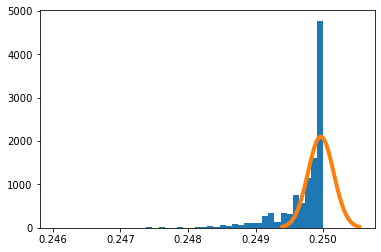

In [1088]:
plt.hist(Bootstrap.var(axis = 1), bins= int(np.sqrt(K)), density = True);
x = np.linspace(Sample.var() - 3*np.sqrt(Var_of_Var), Sample.var() + 3*np.sqrt(Var_of_Var), 100)
plt.plot(x, norm.pdf(x, Sample.var(), np.sqrt(Var_of_Var)), lw=4)
plt.show()

In [1089]:
## quanile of deviations
p = 95
np.percentile(np.abs(Bootstrap.var(axis = 1) - Sample.var()), p)

0.0010529999999999984

In [1090]:
#quantile of deviations based on 
(np.sqrt(Var_of_Var))*norm.ppf((p+100)/200)

0.00037185024327344464